<a href="https://colab.research.google.com/github/1hpDrew/Fashion_Mnist_Siamese/blob/main/Fashion_Mnist_Siamese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [2]:
from tensorflow.keras.datasets import fashion_mnist

(train_image,train_label),(test_image,test_label)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_image.shape

(60000, 28, 28)

In [5]:
len(train_label)

60000

In [6]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_image.shape

(10000, 28, 28)

In [8]:
len(test_label)

10000

# **Preprocess data**

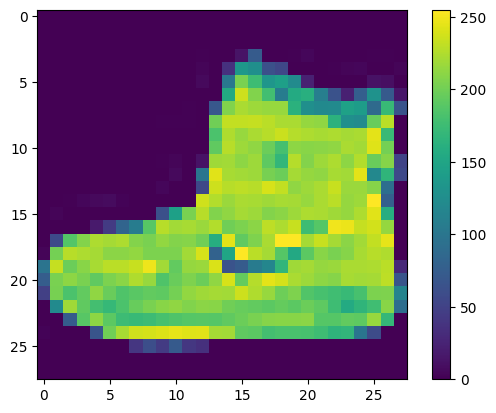

In [9]:
plt.figure()
plt.imshow(train_image[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [10]:
train_image = train_image / 255.0

test_image = test_image / 255.0

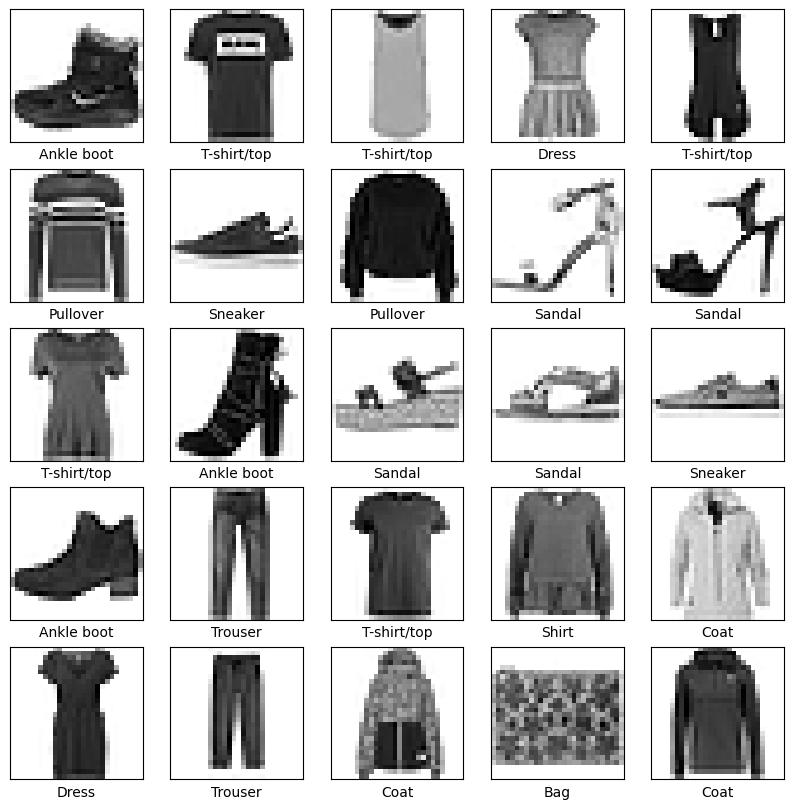

In [19]:
plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_image[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_label[i]])

plt.show()


## Build the **Model**

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

## Compile the model

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model


In [14]:
model.fit(train_image, train_label, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.5019 - accuracy: 0.8236
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3769 - accuracy: 0.8637
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3396 - accuracy: 0.8760
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3109 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2963 - accuracy: 0.8901
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2817 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2685 - accuracy: 0.9012
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2551 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2458 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2

# Evaluate accuracy and Loss

In [23]:
test_loss, test_acc = model.evaluate(test_image,  test_label, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)


313/313 - 1s - loss: 0.3421 - accuracy: 0.8843 - 925ms/epoch - 3ms/step

Test accuracy: 0.8842999935150146

Test loss: 0.3420896530151367


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data.

# Make Prediction

Attach a softmax layer to convert the model's linear outputs

In [24]:
probability_model=tf.keras.Sequential([model,
                                       tf.keras.layers.Softmax()])

In [25]:
predictions=probability_model.predict(test_image)

313/313 [==============================] - 1s 3ms/step


In [26]:
predictions[0]

array([8.9128340e-09, 4.3521395e-11, 4.7991108e-11, 7.6472106e-14,
       1.4199625e-11, 7.0323230e-04, 2.3047787e-07, 1.4106344e-03,
       1.8790668e-07, 9.9788564e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [27]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or class_names[9]

In [28]:
class_names[9]

'Ankle boot'

In [30]:
test_label[0]

9

# Verify Predictions

Graph this to look at the full set of 10 class predictions.

In [32]:
def plot_image(i,predictions_array,true_label,img):
  true_label,img=true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img,cmap=plt.cm.binary)

  predicted_label= np.argmax(predictions_array)
  if predicted_label == true_label:
    color='blue'
  else:
    color='red'

  plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color)


def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])

  thisplot = plt.bar(range(10), predictions_array, color="#777777")

  plt.ylim([0, 1])

  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


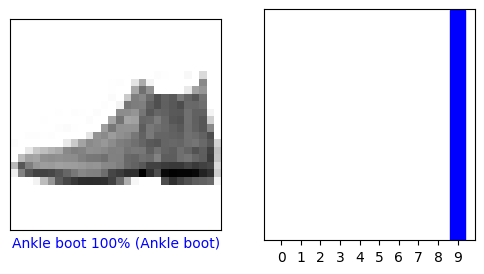

In [33]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
#the figure has 1 row, 2 columns, and this plot is the first plot.
plot_image(i,predictions[i],test_label,test_image)
plt.subplot(1,2,2)
#the figure has 1 row, 2 columns, and this plot is the second plot.
plot_value_array(i,predictions[i],test_label)
plt.show()


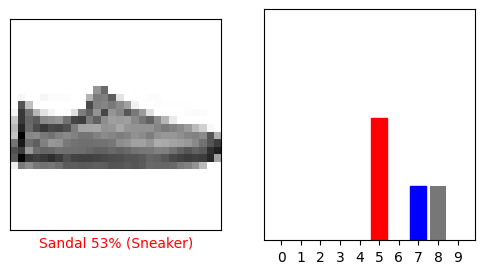

In [34]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_label, test_image)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_label)
plt.show()

model can be wrong even when very confident

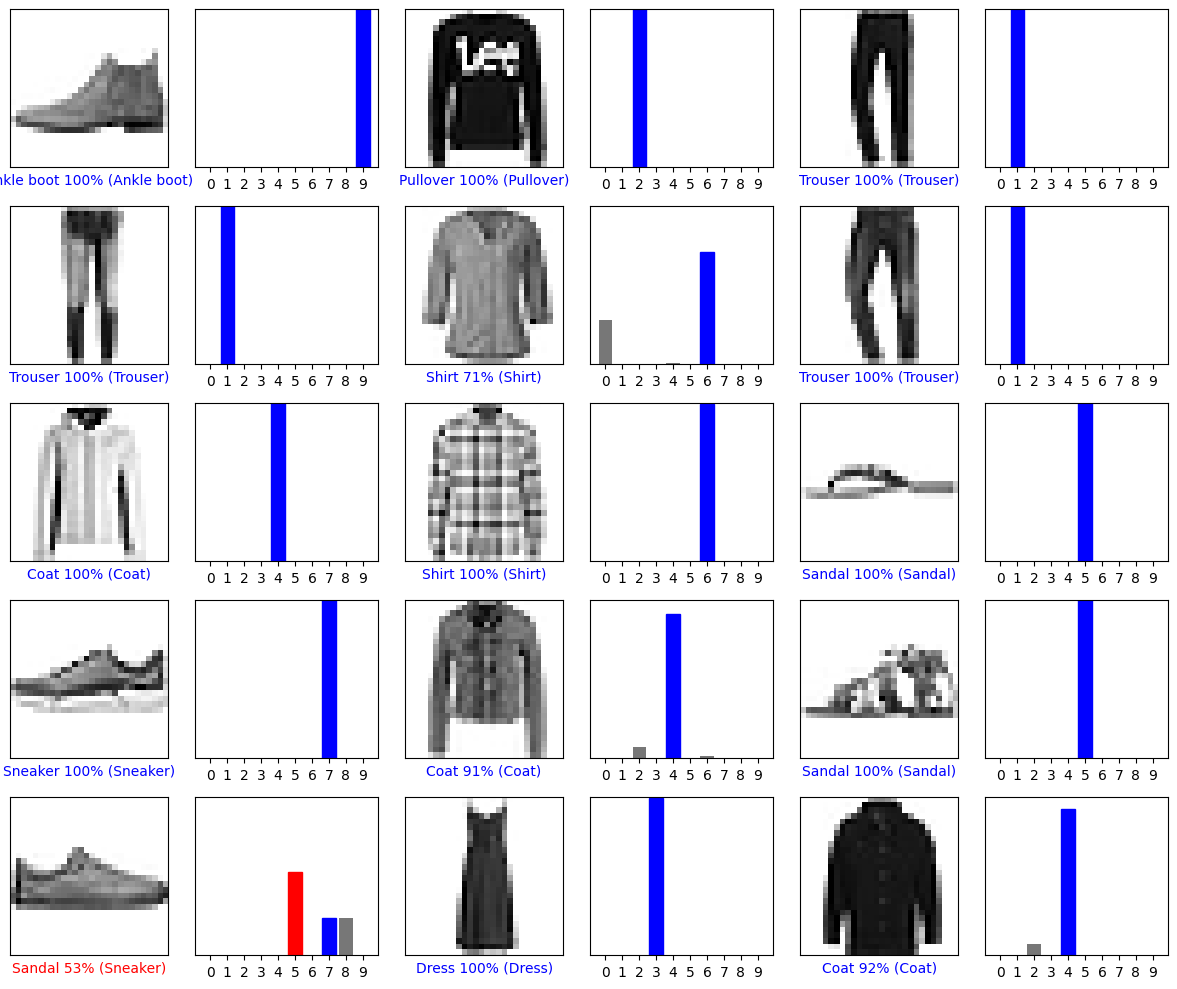

In [43]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_label, test_image)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_label)
plt.tight_layout()
plt.show()

# Use trained model

Finally, use the trained model to make a prediction about a single image.



In [52]:
img=test_image[1]
print(img.shape)

(28, 28)


In [53]:
# Add the image to a batch where it's the only member.

img=(np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


Now predict correct lable for this image

In [54]:
prediction_single=probability_model.predict(img)

print(prediction_single)

1/1 [==============================] - 0s 39ms/step
[[2.9246670e-05 2.5610401e-15 9.9981219e-01 1.8523262e-12 1.2601595e-04
  7.4028731e-15 3.2571275e-05 9.7448616e-15 1.7863062e-11 1.5052543e-14]]


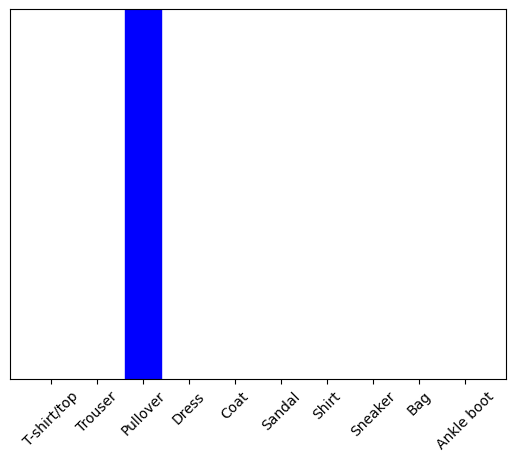

In [55]:
plot_value_array(1,prediction_single[0],test_label)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [57]:
np.argmax(prediction_single[0])

2

And the model predicts a label as expected.

